# Plotting

This notebook demonstrates some of Conx's functions for visualizing the behavior of networks. First, let's create a simple XOR network to explore.

In [1]:
import conx as cx

Using TensorFlow backend.
Conx, version 3.6.1


In [2]:
net = cx.Network("XOR 2-3-1 Network")
net.add(cx.Layer("input", shape=2))
net.add(cx.Layer("hidden", shape=3, activation='sigmoid'))
net.add(cx.Layer("output", shape=1, activation='sigmoid'))
net.connect()

XOR = [
    ([0, 0], [0], "1"),
    ([0, 1], [1], "2"),
    ([1, 0], [1], "3"),
    ([1, 1], [0], "4")
]
net.dataset.load(XOR)
net.dataset.info()

net.compile(loss='mean_squared_error', optimizer='sgd', lr=0.3, momentum=0.9)

**Dataset**: Dataset for XOR 2-3-1 Network

**Information**:
   * name    : None
   * length  : 4

**Input Summary**:
   * shape  : (2,)
   * range  : (0.0, 1.0)

**Target Summary**:
   * shape  : (1,)
   * range  : (0.0, 1.0)



<IPython.core.display.Javascript object>


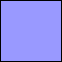
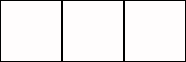
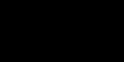

In [3]:
net.picture()

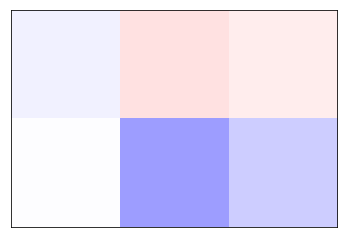

In [4]:
cx.view(net.get_weights_as_image("hidden"))

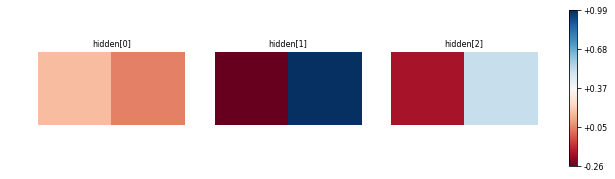

In [8]:
net.plot_layer_weights('hidden', colormap="RdBu"

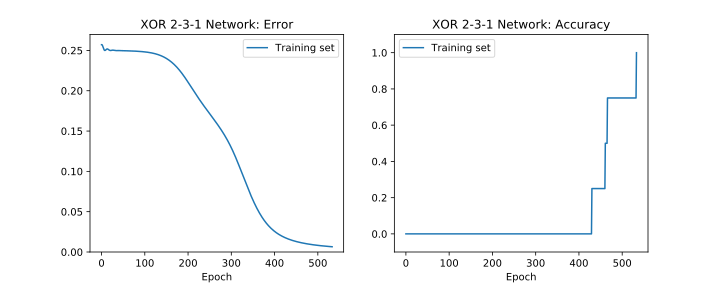

       |  Training |  Training 
Epochs |     Error |  Accuracy 
------ | --------- | --------- 
#  533 |   0.00652 |   1.00000 


In [6]:
net.train(epochs=1000, accuracy=1, report_rate=25, record=True)

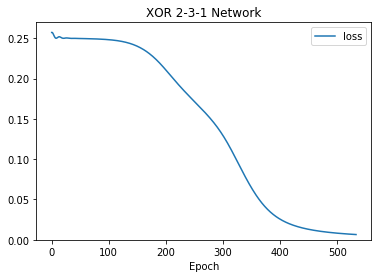

In [7]:
net.plot('loss', ymin=0)

## plot_activation_map

This plotting function allows us to see the activation of a specific unit in a specific layer, as a function of the activations of two other units from an earlier layer. In this example, we show the behavior of the single output unit as the two input units are varied across the range 0.0 to 1.0:

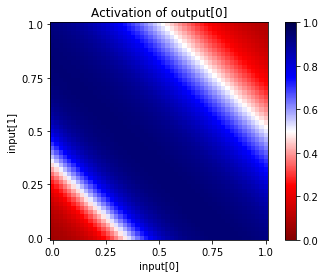

In [8]:
net.plot_activation_map('input', (0,1), 'output', 0)

We can verify the above output activation map by running different input vectors through the network manually:

In [9]:
print(net.propagate([0,0])[0])
print(net.propagate([1,1])[0])
print(net.propagate([0.5, 0.5])[0])
print(net.propagate([0, 0.6])[0])

0.06735210865736008
0.09960916638374329
0.9248424768447876
0.8984166383743286


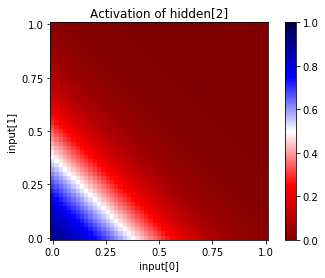

----------------------------------------------------------------------------------------------------
Activation of hidden[2] as a function of input[0] and input[1]
rows: input[1] decreasing from 1.00 to 0.00
cols: input[0] increasing from 0.00 to 1.00

0.03 0.02 0.01 0.01 0.01 0.01 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.04 0.03 0.02 0.01 0.01 0.01 0.01 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.05 0.04 0.03 0.02 0.01 0.01 0.01 0.01 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.06 0.05 0.04 0.03 0.02 0.01 0.01 0.01 0.01 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.09 0.06 0.05 0.04 0.03 0.02 0.01 0.01 0.01 0.01 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.11 0.09 0.06 0.05 0.04 0.03 0.02 0.01 0.01 0.01 0.01 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.15 0.11 0.08 0.06 0.05 0.04 0.03 0.02 0.01 0.01 0.01 0.01 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.19 0.15 0.11 0.08 0.06 0.05 0.04 0.03 

In [10]:
# map of hidden[2] activation as a function of the inputs
net.plot_activation_map('input', (0,1), 'hidden', 2, show_values=True)

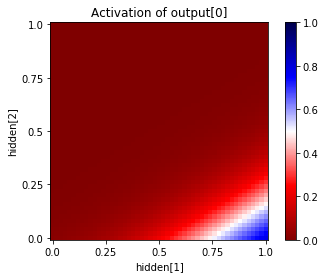

In [11]:
# map of output activation as a function of hidden units 1,2
net.plot_activation_map('hidden', (1,2), 'output', 0)

How does the network actually solve the problem? We can look at the intermediary values at the hidden layer by plotting each of the 4 hidden units in this manner:

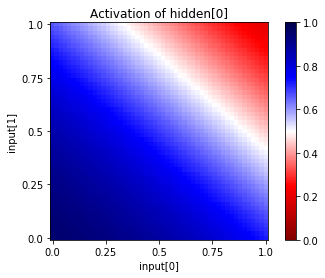

In [12]:
net.plot_activation_map('input', (0,1), 'hidden', 0)

SequenceViewer(children=(VBox(children=(HBox(children=(IntSlider(value=0, continuous_update=False, description='XOR 2-3-1 Network Playback:', layout=Layout(width='100%'), max=533, style=SliderStyle(description_width='initial')), Label(value='of 534', layout=Layout(width='100px'))), layout=Layout(height='40px')), HBox(children=(Button(icon='fast-backward', layout=Layout(width='100%'), style=ButtonStyle()), Button(icon='backward', layout=Layout(width='100%'), style=ButtonStyle()), IntText(value=0, layout=Layout(width='100%')), Button(icon='forward', layout=Layout(width='100%'), style=ButtonStyle()), Button(icon='fast-forward', layout=Layout(width='100%'), style=ButtonStyle()), Button(description='Play', icon='play', layout=Layout(width='100%'), style=ButtonStyle())), layout=Layout(height='50px', width='100%'))), layout=Layout(width='100%')), Output()))

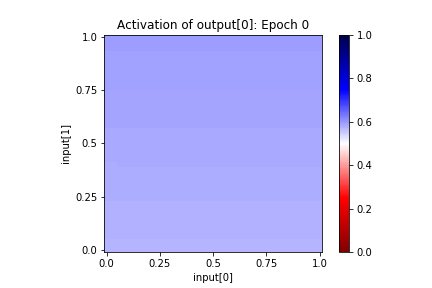

In [13]:
net.playback(lambda net,epoch: net.plot_activation_map(title="Epoch %s" % epoch, format='image'))

## Adding Additional Hidden Layers

In [14]:
net = cx.Network("XOR 2-3-2-1 Network")
net.add(cx.Layer("input", shape=2))
net.add(cx.Layer("hidden", shape=3, activation='sigmoid'))
net.add(cx.Layer("hidden2", shape=2, activation='sigmoid'))
net.add(cx.Layer("output", shape=1, activation='sigmoid'))
net.connect()

XOR = [
    ([0, 0], [0], "1"),
    ([0, 1], [1], "2"),
    ([1, 0], [1], "3"),
    ([1, 1], [0], "4")
]
net.compile(loss='mean_squared_error', optimizer='sgd', lr=0.3, momentum=0.9)
net.dataset.load(XOR)

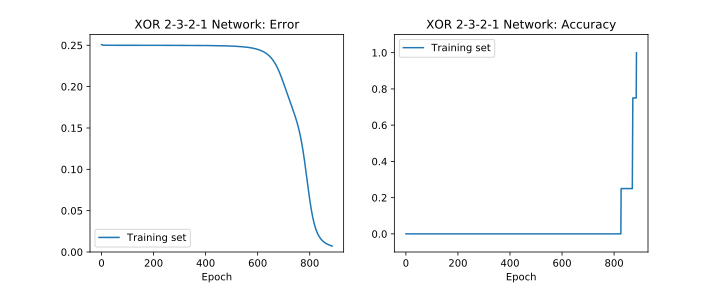

       |  Training |  Training 
Epochs |     Error |  Accuracy 
------ | --------- | --------- 
#  886 |   0.00721 |   1.00000 


In [15]:
net.reset()
net.train(epochs=2000, accuracy=1, report_rate=25)

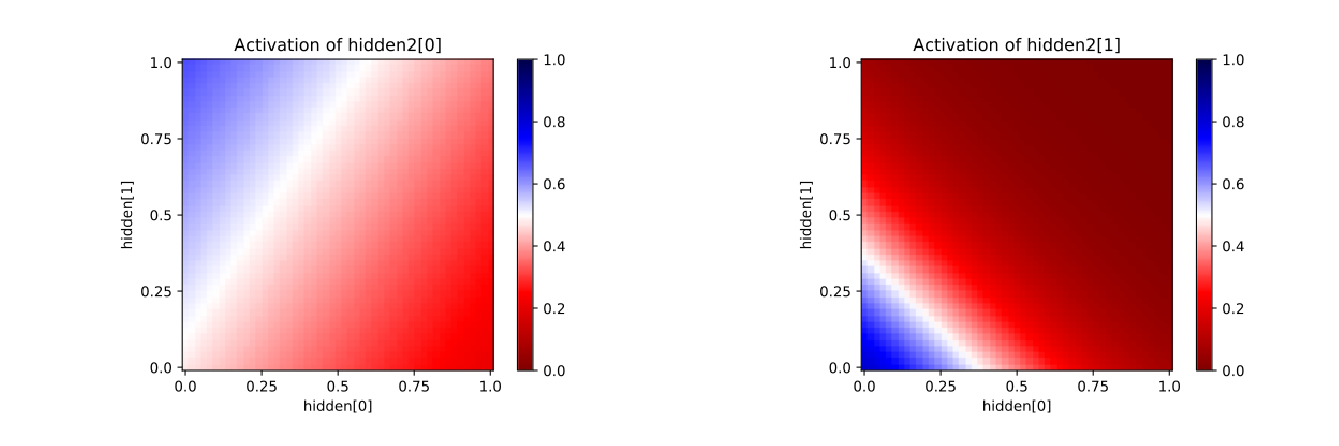

In [16]:
#net.plot_activation_map('hidden', (0,1), 'hidden2', 1)
cx.view([net.plot_activation_map('hidden', (0,1), 'hidden2', i, format='svg') for i in range(2)], scale=10)

## Plotting training error (loss) and training accuracy (acc)

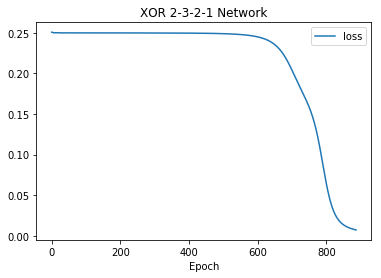

In [17]:
net.plot("loss")

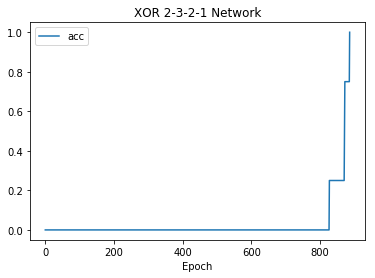

In [18]:
net.plot("acc")

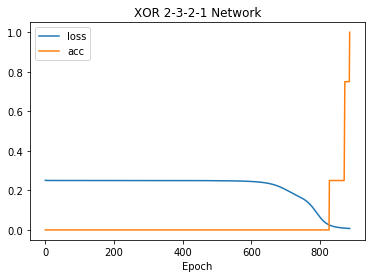

In [19]:
net.plot(["loss", "acc"])

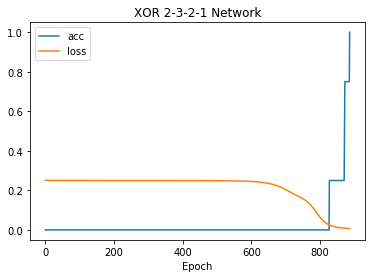

In [20]:
net.plot("all")

## Plotting Your Own Data

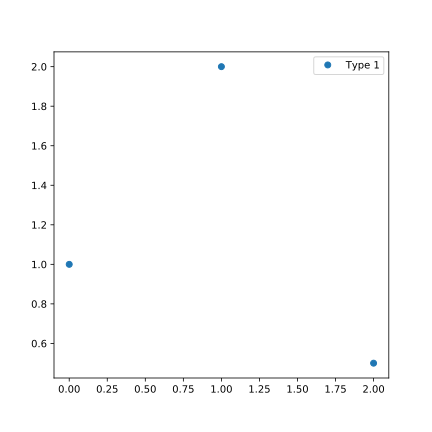

In [21]:
data = ["Type 1", [(0, 1), (1, 2), (2, .5)]]
cx.scatter(data)

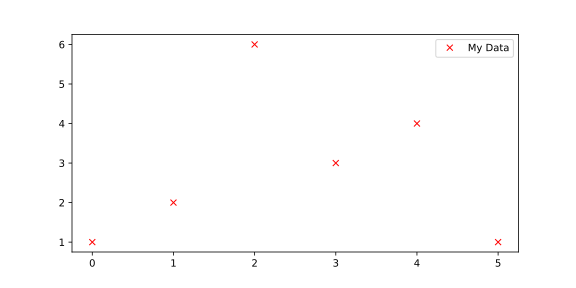

In [22]:
data = ["My Data", [1, 2, 6, 3, 4, 1]]
symbols = {"My Data": "rx"}
cx.plot(data, symbols=symbols)

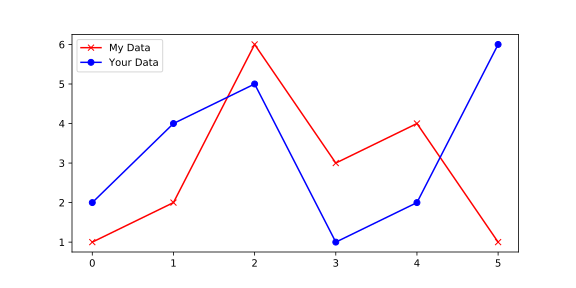

In [23]:
data = [["My Data", [1, 2, 6, 3, 4, 1]],
        ["Your Data", [2, 4, 5, 1, 2, 6]]]
symbols = {"My Data": "rx-", "Your Data": "bo-"}
cx.plot(data, symbols=symbols)